In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import io

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

In [0]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [0]:
pd.isna(df)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [0]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# EDA

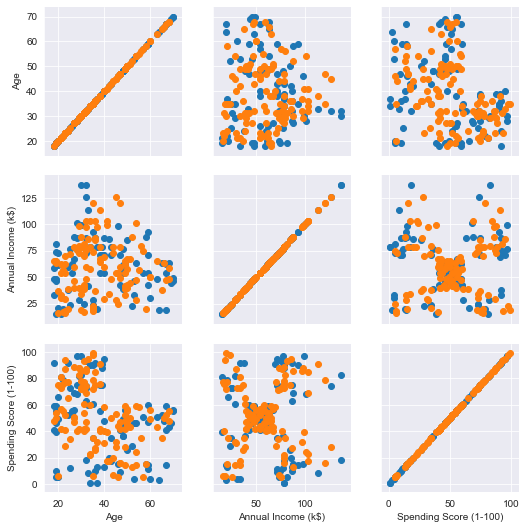

In [0]:
sns.set_style('darkgrid')
p = sns.PairGrid(df,hue='Gender')
p.map(plt.scatter)

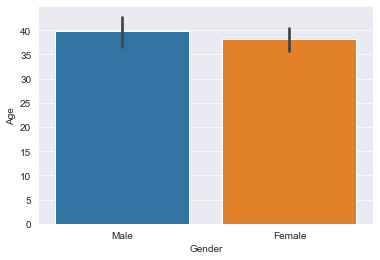

In [0]:
sns.axes_style('darkgrid')
sns.barplot(x='Gender',y='Age',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


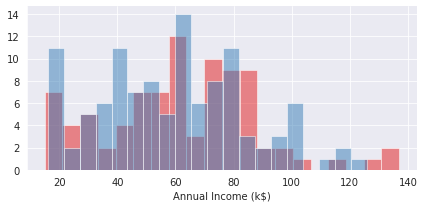

In [0]:

sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Gender",palette='Set1',size=3,aspect=2,sharey=True)
g = g.map(plt.hist,'Annual Income (k$)',bins=20,alpha=0.5)

# KMeans Cluster Classification

In [0]:
from sklearn.cluster import KMeans

In [0]:
df.shape

(200, 5)

In [0]:
#For clustering we shall consider Annual incoma & Spending score
X= df.iloc[:,[3,4]].values

In [0]:
wcss=[]

for i in range(1,11):
    Kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)


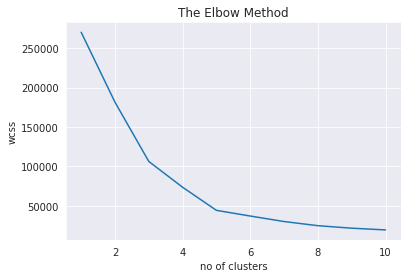

In [0]:
#Elbow Method for deciding number of cluster

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [0]:
kmeans = KMeans(n_clusters=5)

In [0]:
model=kmeans.fit_predict(X)

In [0]:
kmeans.cluster_centers_

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

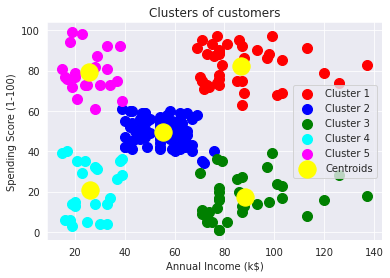

In [0]:
#Visualizing model:

plt.scatter(X[model == 0, 0], X[model == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[model == 1, 0], X[model == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[model == 2, 0], X[model == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[model == 3, 0], X[model == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[model == 4, 0], X[model == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()